In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [3]:
df=pd.read_csv('bigmart_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [6]:
df.describe().style.highlight_max()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

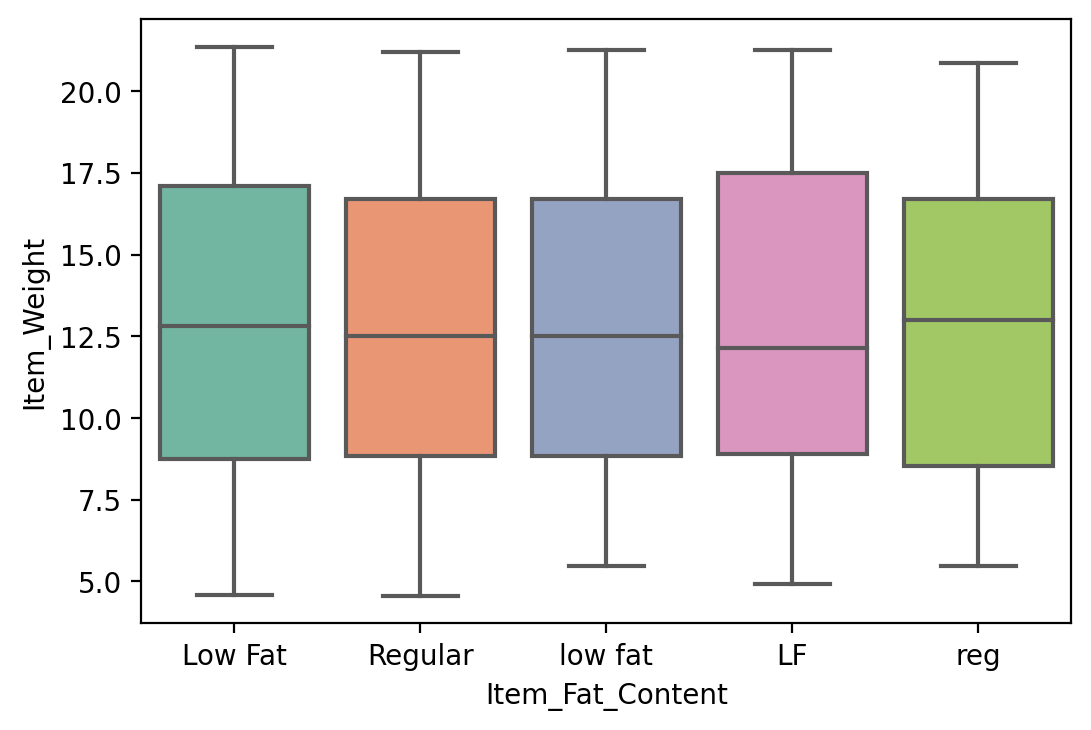

In [7]:
#not yet for EDA analysis we just checking out somethings!!!

plt.figure(dpi=200)
sns.boxplot(data=df,x='Item_Fat_Content',y='Item_Weight',palette='Set2')


In [8]:
med=df['Item_Weight'].median()

med

12.6

In [9]:
df['Item_Weight']=df['Item_Weight'].fillna(med)

In [10]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
df['Outlet_Size']=np.where(df['Outlet_Size'].isnull(),'_missing_value_',df['Outlet_Size'])

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


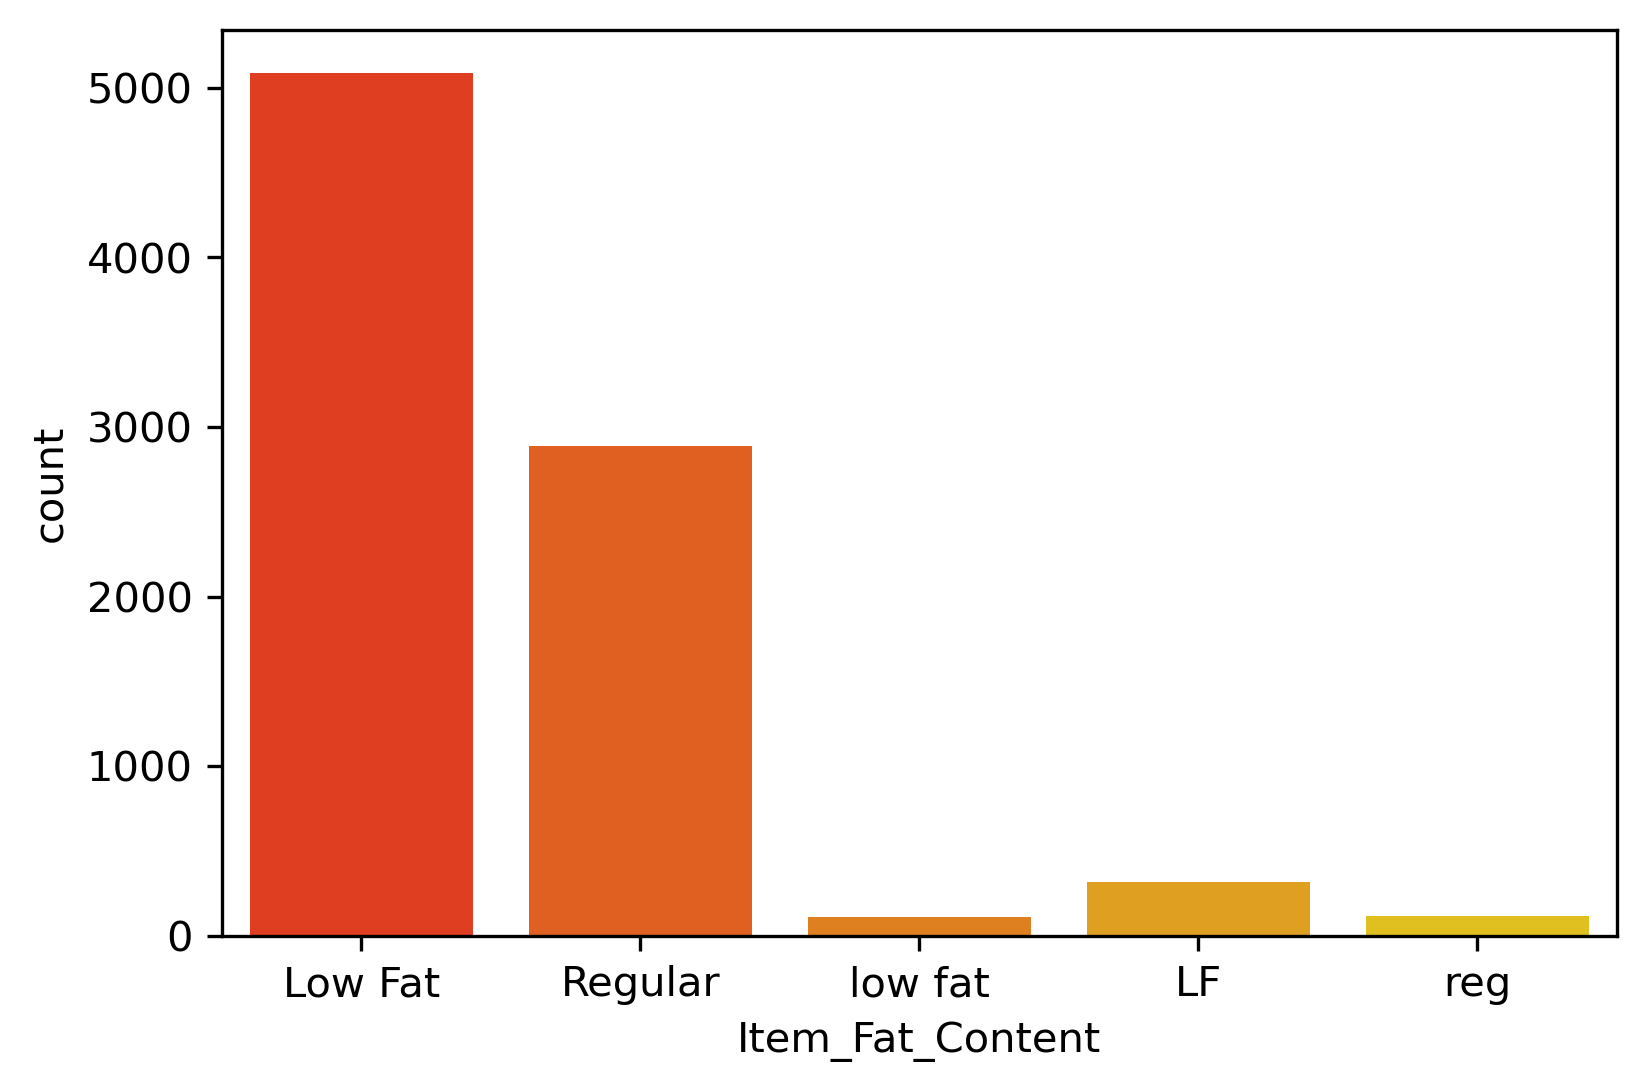

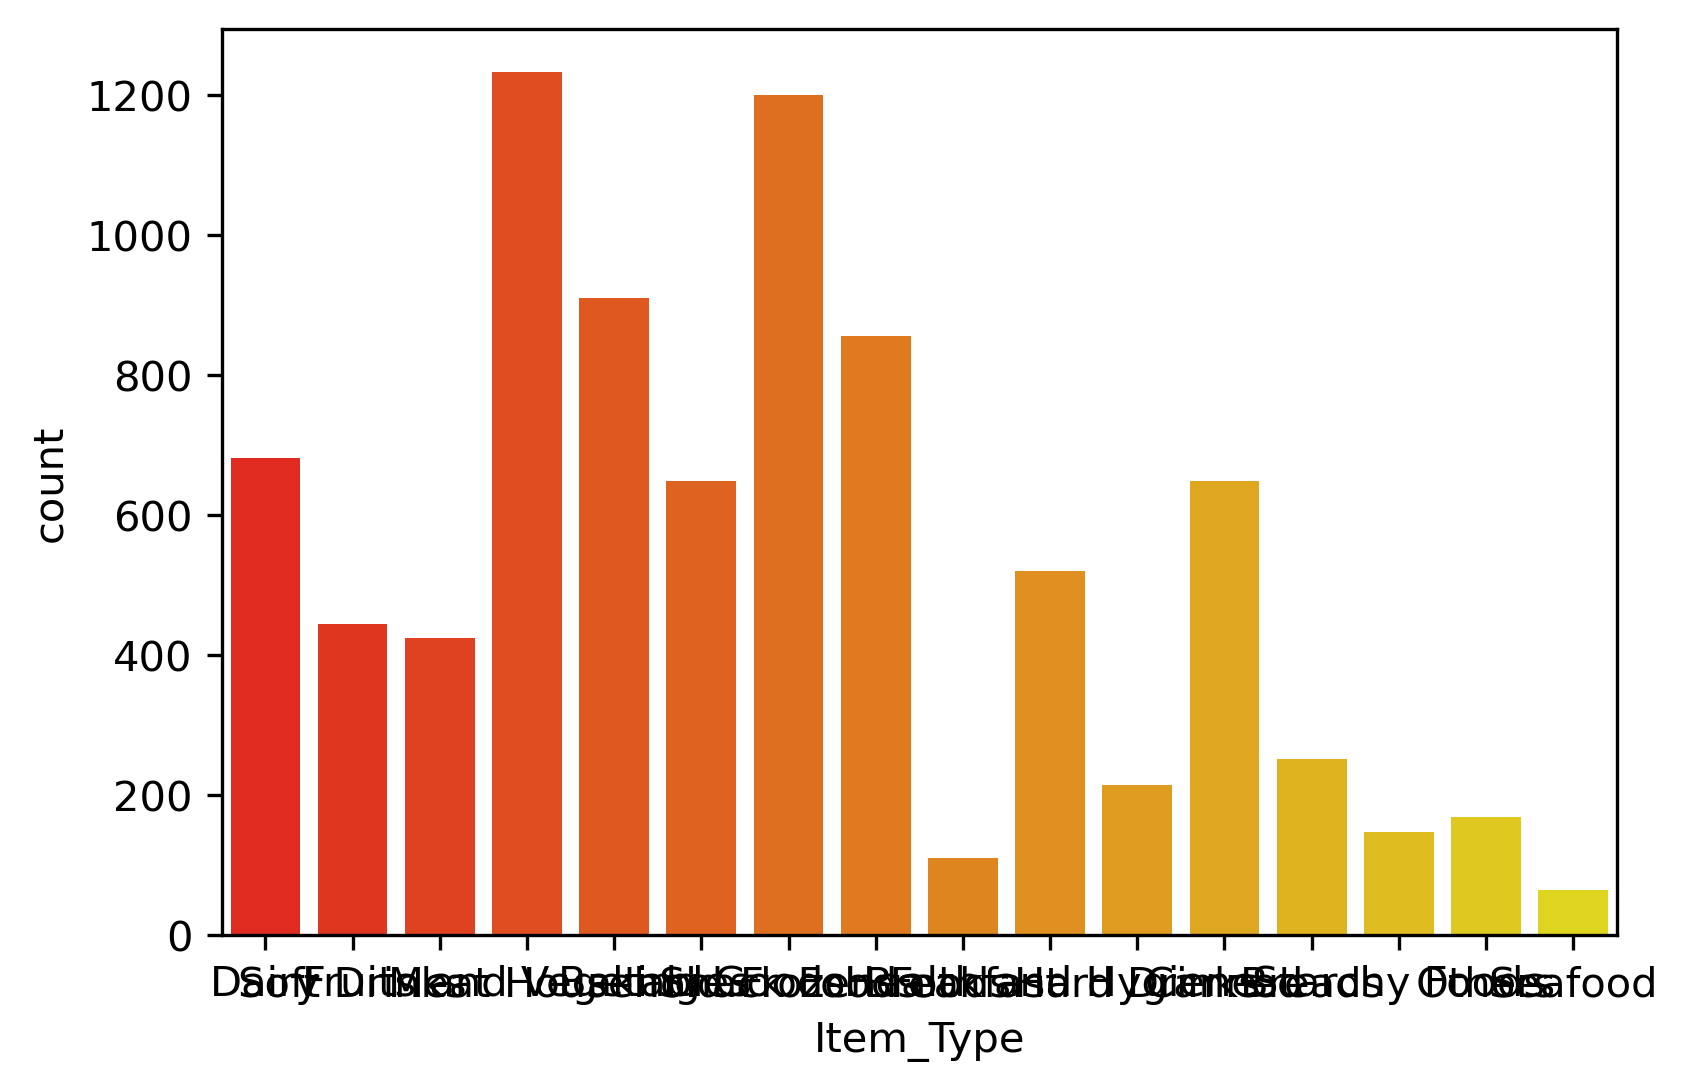

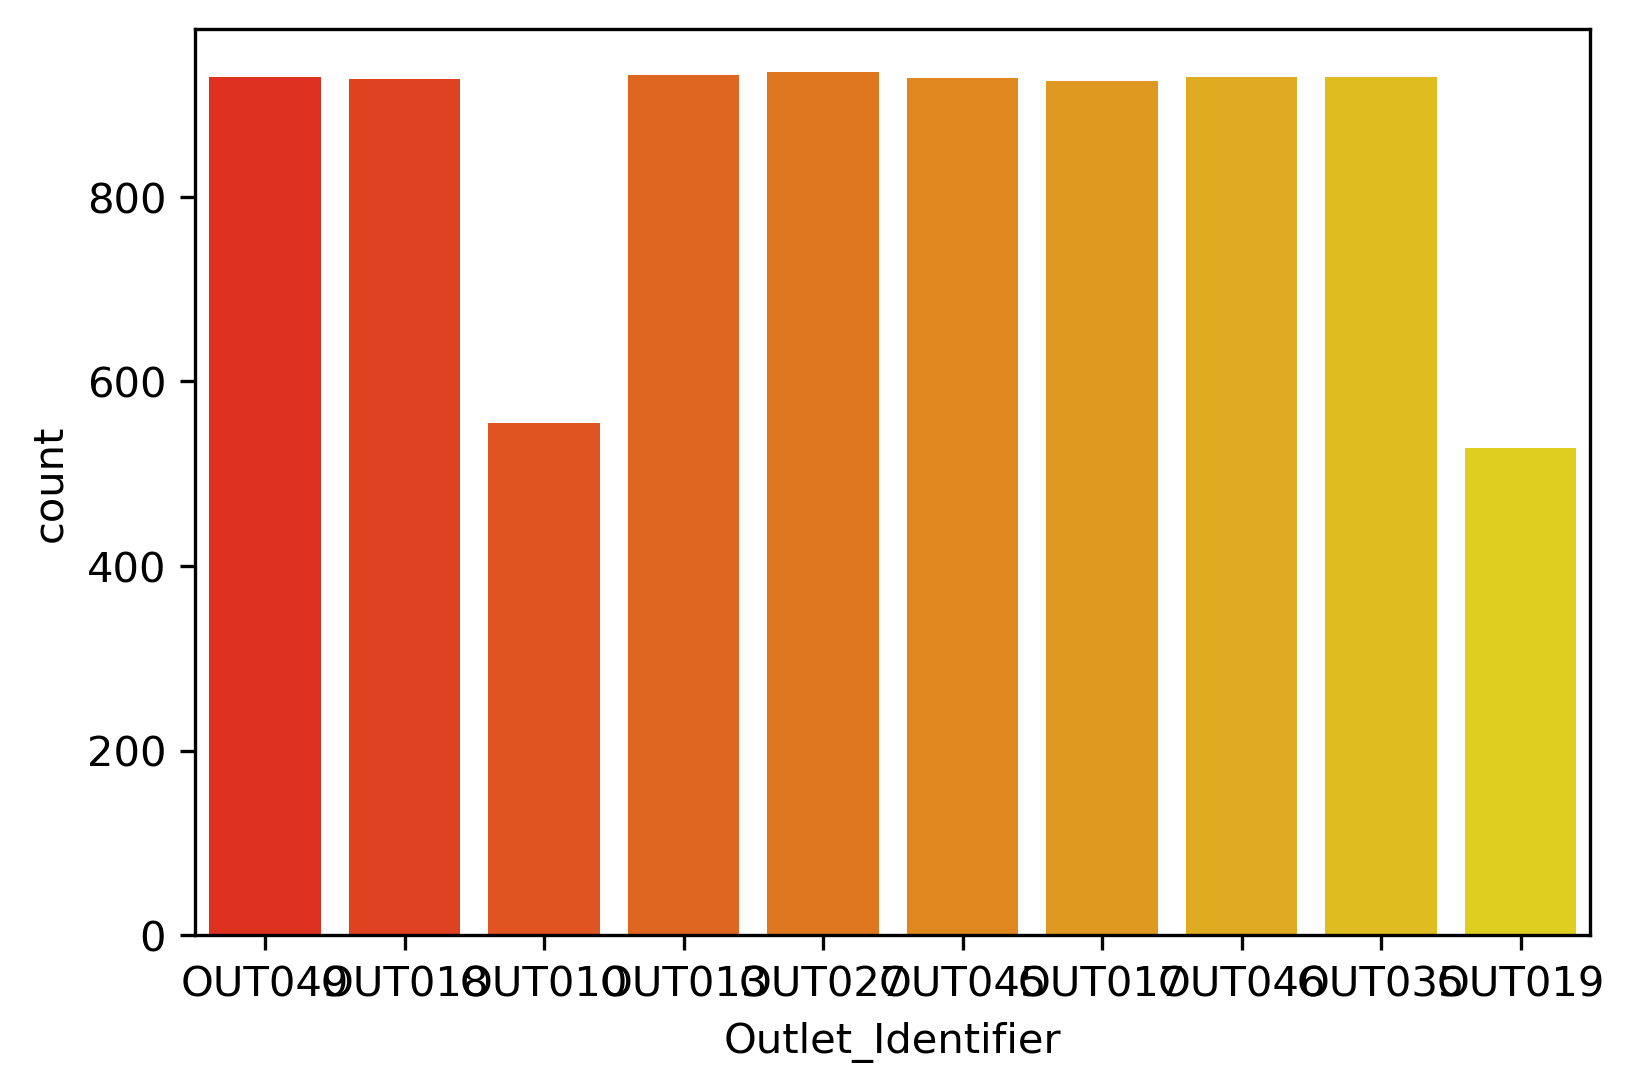

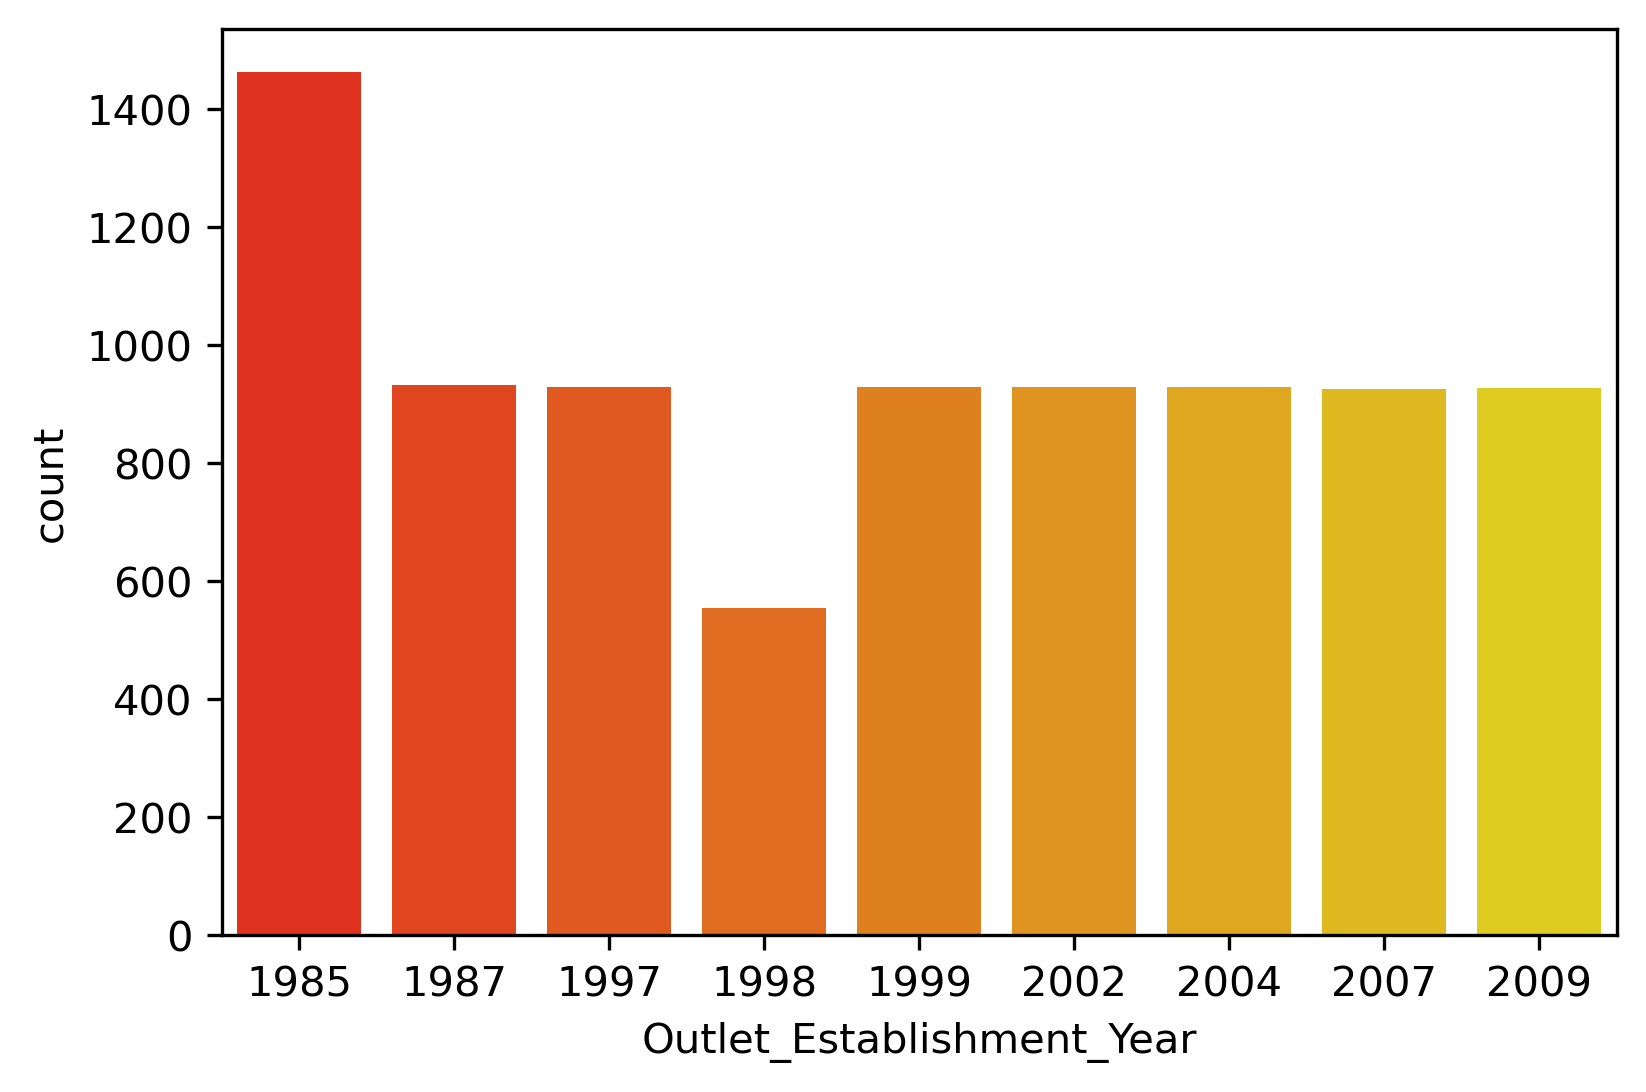

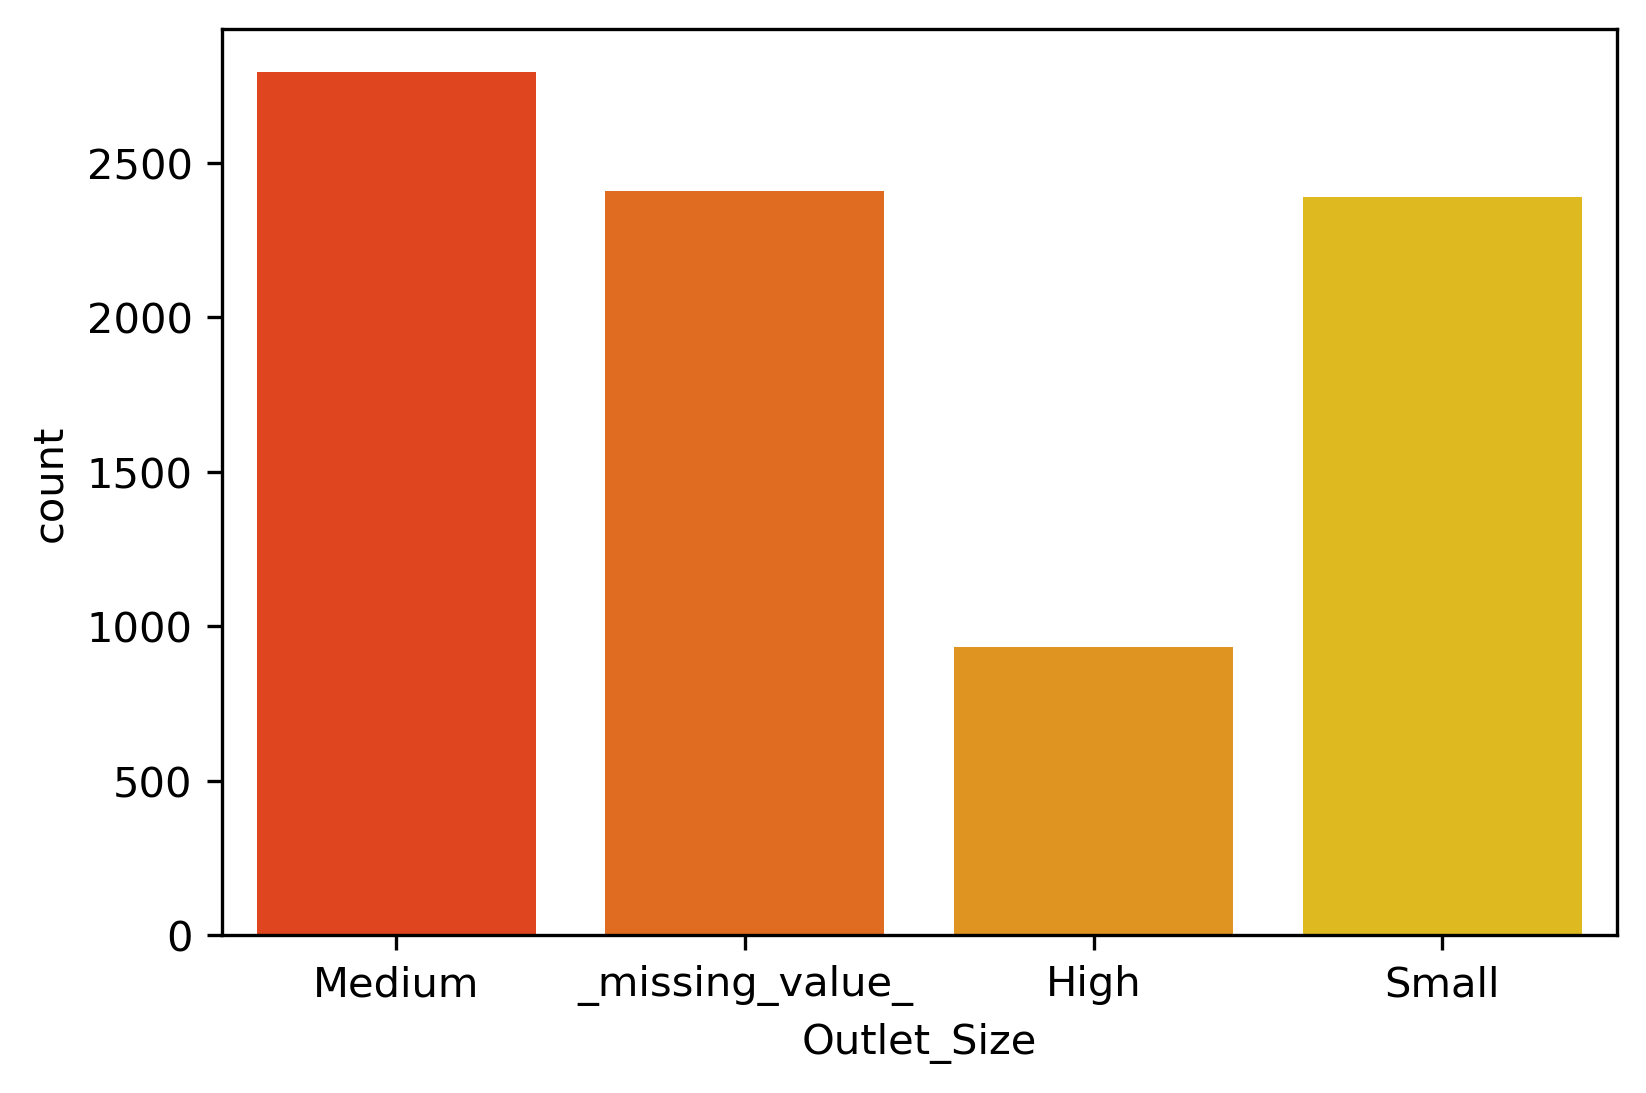

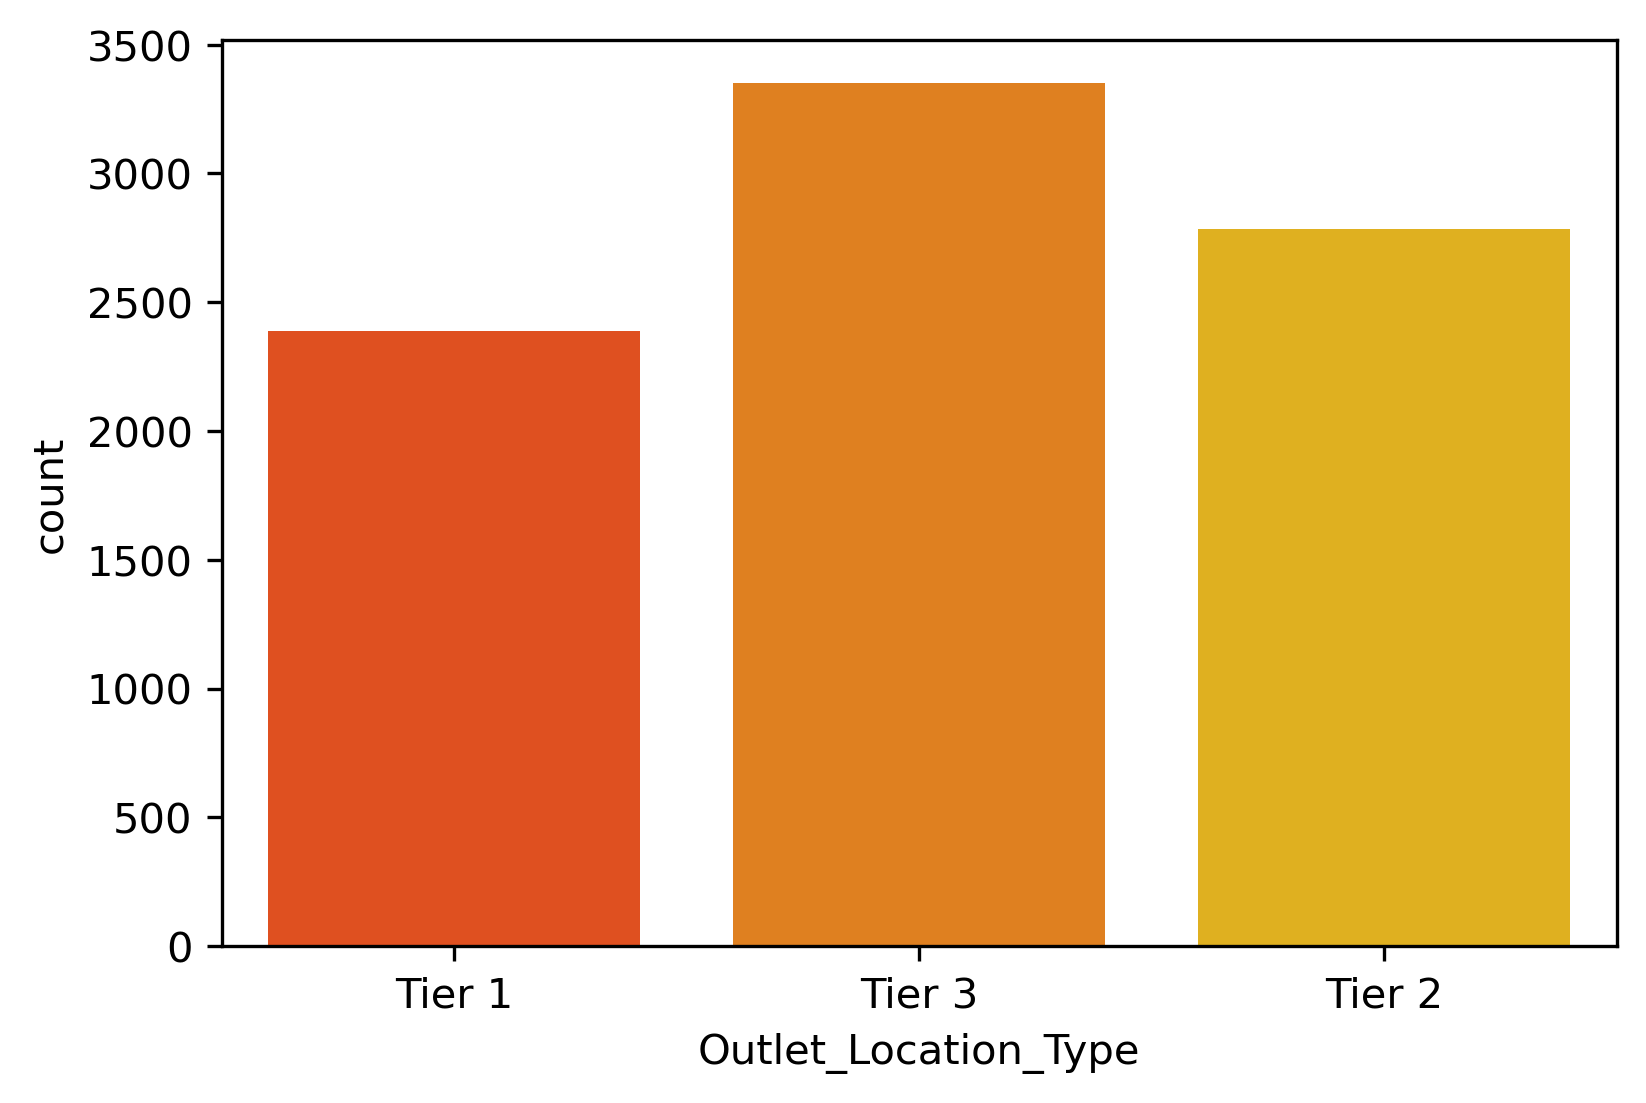

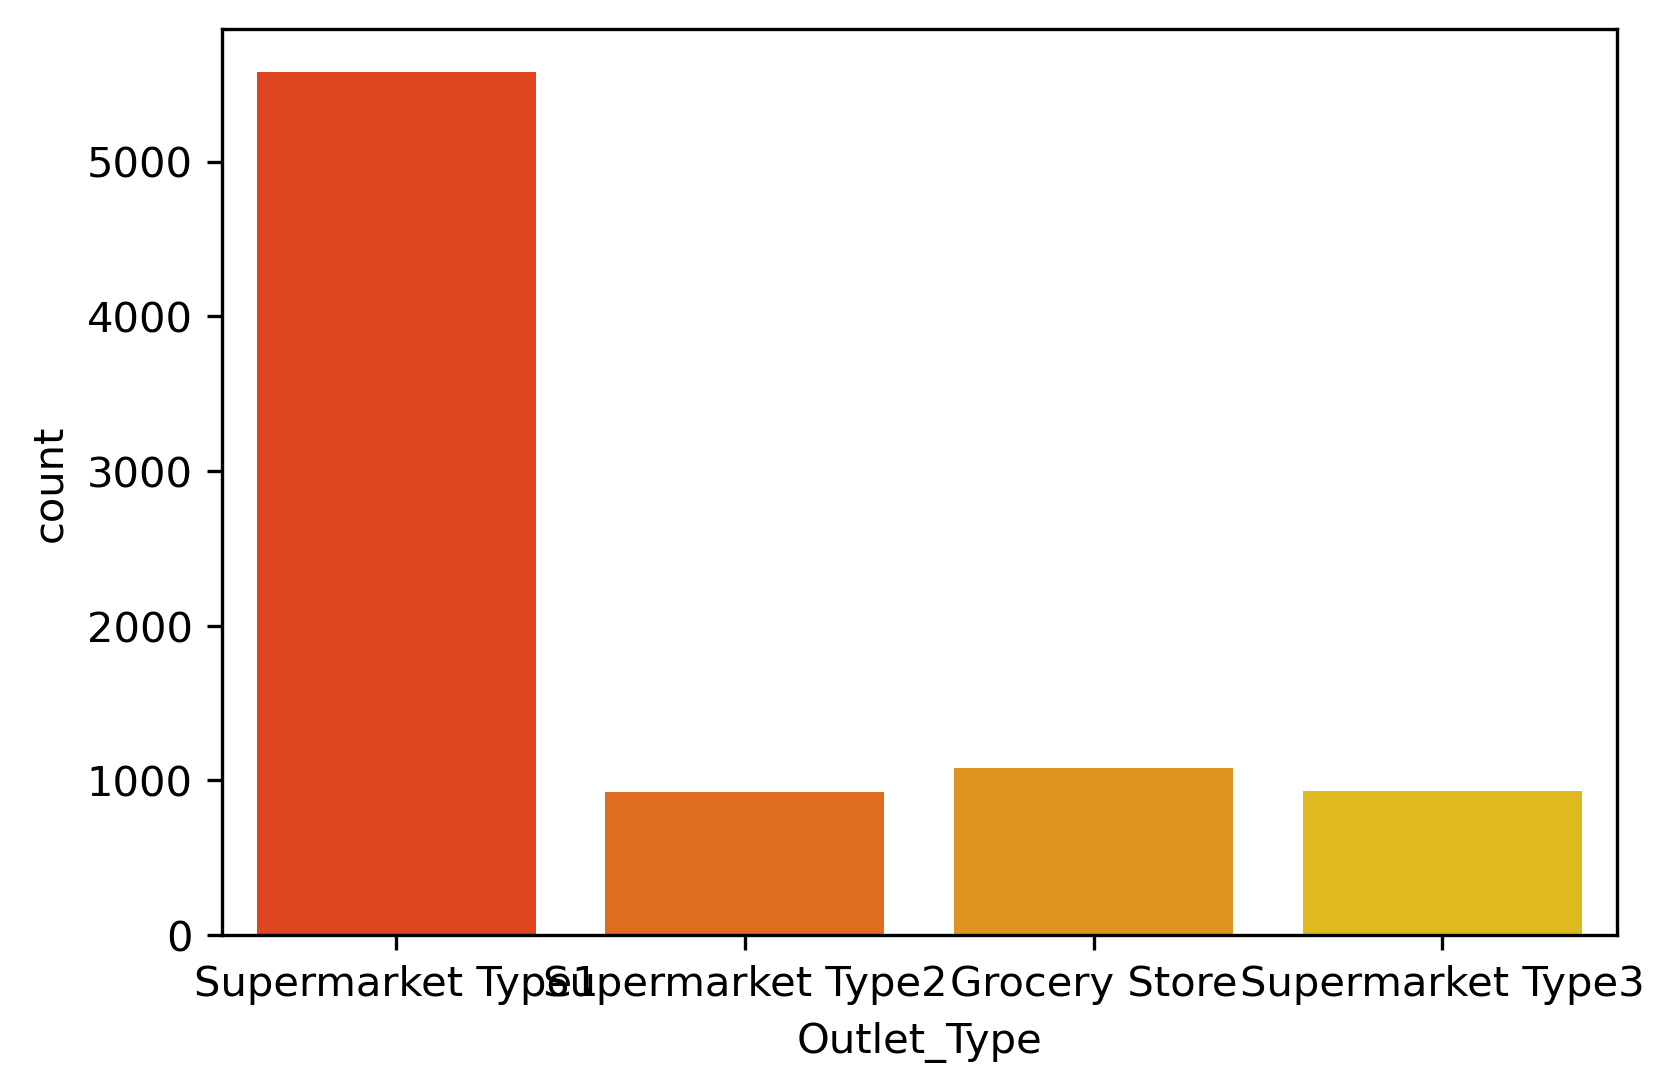

In [14]:
for i, col in enumerate(df.drop(columns=['Item_Identifier','Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'],axis=1)):
    plt.figure(i,dpi=300)
    sns.countplot(data=df,x=col,palette='autumn')

In [17]:
df['Outlet_Identifier'].value_counts(), df['Outlet_Establishment_Year'].value_counts()


(OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 1985    1463
 1987     932
 1999     930
 1997     930
 2004     930
 2002     929
 2009     928
 2007     926
 1998     555
 Name: Outlet_Establishment_Year, dtype: int64)

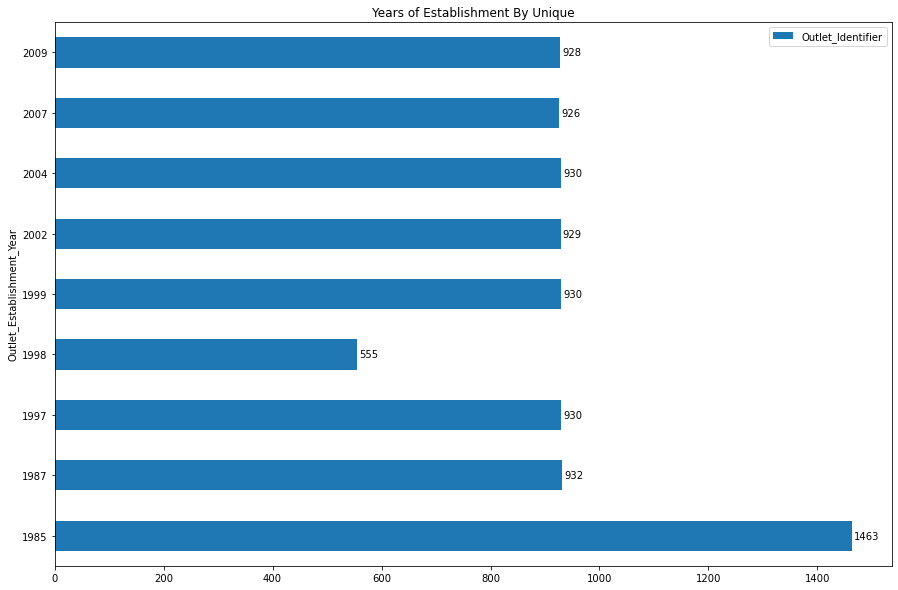

In [34]:
#Year of establlishment By Outlet

fig=df[['Outlet_Identifier','Outlet_Establishment_Year']].groupby('Outlet_Establishment_Year').count().plot(kind='barh',figsize=(15,10))
plt.title('Years of Establishment By Unique')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)


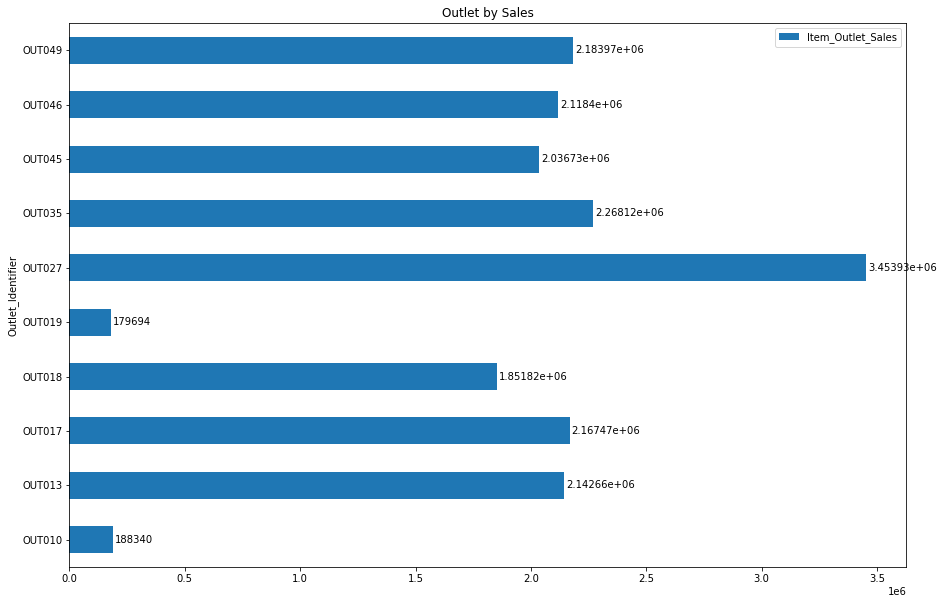

In [35]:
#outlet that Making more sales.

fig=df[['Item_Outlet_Sales','Outlet_Identifier']].groupby('Outlet_Identifier').sum().plot(kind='barh',figsize=(15,10))
plt.title('Outlet by Sales')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)


In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,_missing_value_,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


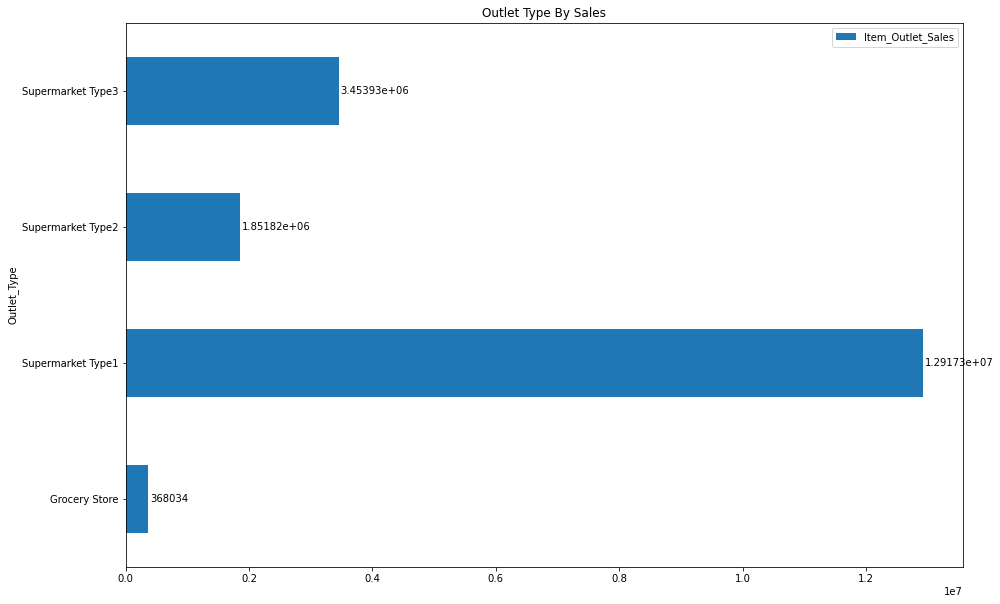

In [44]:
# To Outlet the Size By Sales.

fi=df[['Outlet_Type','Item_Outlet_Sales']].groupby('Outlet_Type').sum().plot(kind='barh',figsize=(15,10))
plt.title('Outlet Type By Sales')
for container in fi.containers:
    fi.bar_label(container,label_type='edge',padding=2)

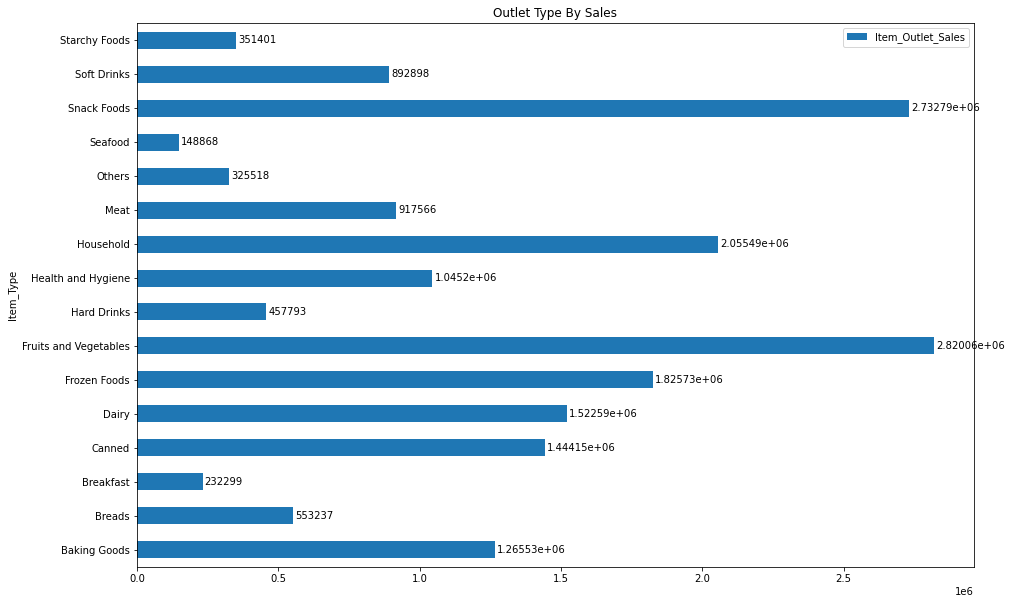

In [49]:
# The goods(Item_Type) gooding well.

fi=df[['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').sum().plot(kind='barh',figsize=(15,10))
plt.title('Outlet Type By Sales')
for container in fi.containers:
    fi.bar_label(container,label_type='edge',padding=2)

In [60]:
# The goods(Item_Type) gooding well in all the Outlet.
pd.DataFrame(df.groupby(by=['Item_Type','Outlet_Identifier']).sum()['Item_Outlet_Sales']).style.bar()

In [64]:
pd.DataFrame(df.groupby(by=['Outlet_Type','Item_Type']).sum()['Item_Outlet_Sales']).style.bar(color='skyblue')

In [65]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


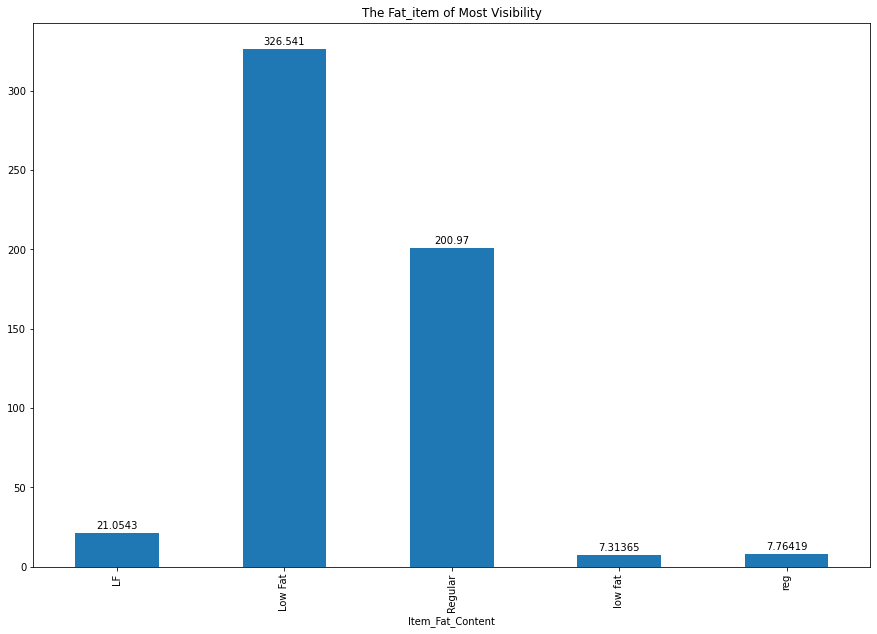

In [68]:
fig=df.groupby('Item_Fat_Content')['Item_Visibility'].sum().plot(kind='bar',figsize=(15,10))
plt.title('The Fat_item of Most Visibility')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

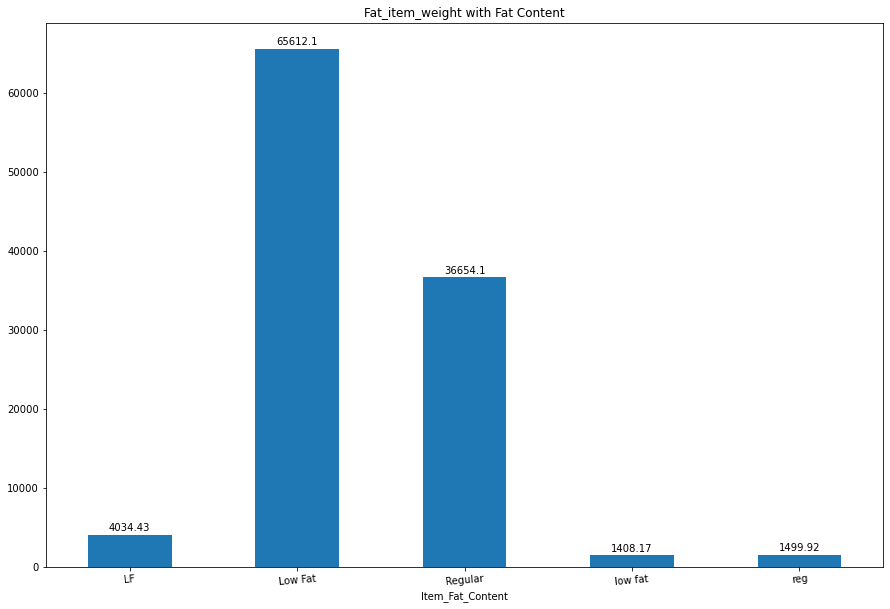

In [71]:
fig=df.groupby('Item_Fat_Content')['Item_Weight'].sum().plot(kind='bar',figsize=(15,10))
plt.title('Fat_item_weight with Fat Content')
plt.xticks(rotation=5)
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2) 